In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [2]:
def generate_random_points(n):
    np.random.seed(42)
    return np.random.rand(n, 2) * 100

In [3]:


# K-means Clustering
def k_means(points, k, max_iter=100):
    n = points.shape[0]
    centroids = points[np.random.choice(n, k, replace=False)]
    for _ in range(max_iter):
        distances = pairwise_distances(points, centroids)
        assignments = np.argmin(distances, axis=1)

        new_centroids = np.zeros((k, 2))
        for j in range(k):
            cluster_points = points[assignments == j]
            if len(cluster_points) > 0:
                new_centroids[j] = cluster_points.mean(axis=0)
            else:
                new_centroids[j] = centroids[j]
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return assignments, centroids

# K-medoids Clustering
def k_medoids(points, k, max_iter=100):
    n = points.shape[0]

    medoid_indices = np.random.choice(n, k, replace=False)
    medoids = points[medoid_indices]

    for _ in range(max_iter):
        distances = pairwise_distances(points, medoids)
        assignments = np.argmin(distances, axis=1)

        new_medoids = np.copy(medoids)
        for j in range(k):
            cluster_points = points[assignments == j]
            if len(cluster_points) > 0:
                costs = pairwise_distances(cluster_points, cluster_points).sum(axis=1)
                best_idx = np.argmin(costs)
                new_medoids[j] = cluster_points[best_idx]
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids

    return assignments, medoids

# Fuzzy C-means Clustering
def fuzzy_c_means(points, k, m=2.0, max_iter=100, error=1e-5):
    n = points.shape[0]
    membership = np.random.rand(n, k)
    membership /= membership.sum(axis=1, keepdims=True)

    for _ in range(max_iter):
        old_membership = membership.copy()

        centroids = np.zeros((k, 2))
        for j in range(k):
            u_m = membership[:, j] ** m
            centroids[j] = (u_m[:, np.newaxis] * points).sum(axis=0) / u_m.sum()

        distances = pairwise_distances(points, centroids)
        for i in range(n):
            for j in range(k):
                if distances[i, j] == 0:
                    membership[i] = 0
                    membership[i, j] = 1
                    break
                else:
                    membership[i, j] = 1.0 / sum((distances[i, j] / distances[i, c]) ** (2 / (m - 1)) for c in range(k))

        if np.max(np.abs(membership - old_membership)) < error:
            break

    assignments = np.argmax(membership, axis=1)
    return assignments, centroids, membership

def plot_clusters(points, assignments, centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], c=assignments, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centers')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


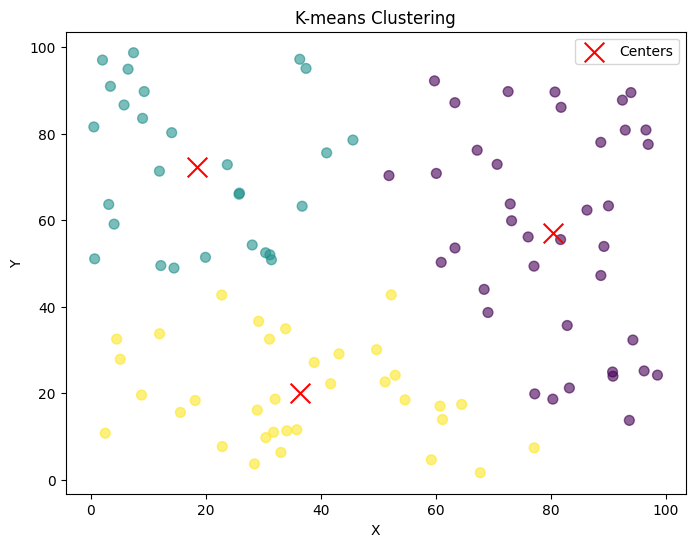

K-means Centroids:
 [[80.39633036 57.02699918]
 [18.52094308 72.22806541]
 [36.37624845 20.00804288]]


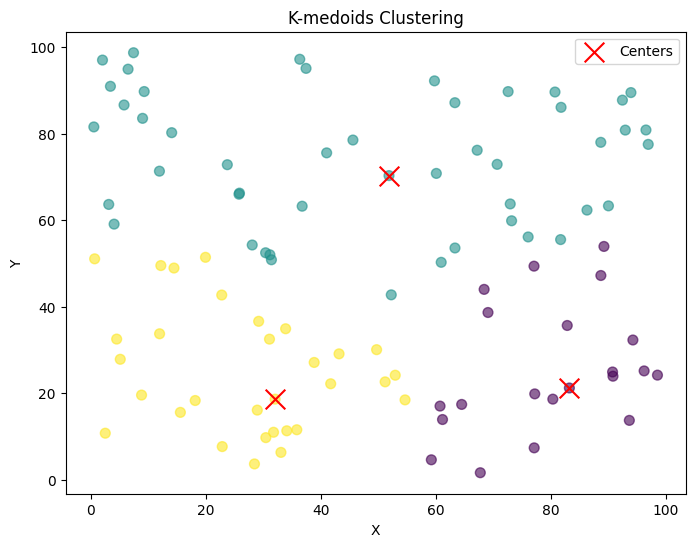

K-medoids Medoids:
 [[83.24426408 21.23391107]
 [51.87906217 70.30189589]
 [32.0780065  18.65185104]]


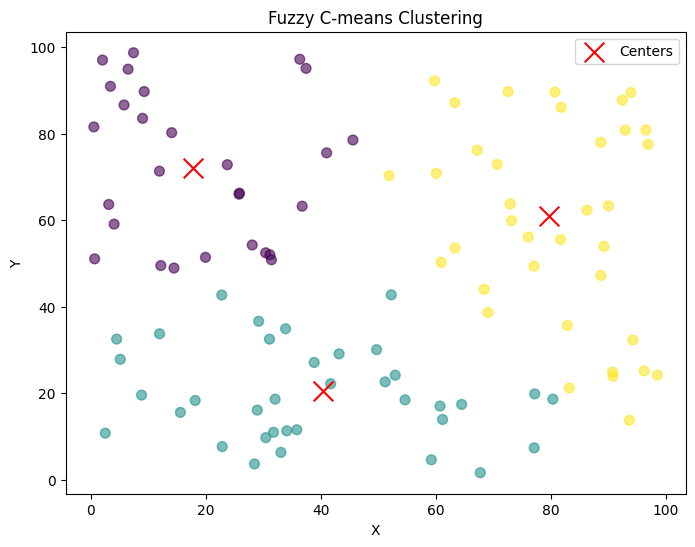

Fuzzy C-means Centroids:
 [[17.85559335 72.00627467]
 [40.454932   20.579238  ]
 [79.78738888 61.08254057]]
Sample Membership Values (first 5 points):
 [[0.67767067 0.11169547 0.21063386]
 [0.01355831 0.01664092 0.96980077]
 [0.15443592 0.76603619 0.07952789]
 [0.8904431  0.05741971 0.05213719]
 [0.18783064 0.1153751  0.69679426]]


In [4]:
if __name__ == "__main__":
    n = 100
    k = 3
    points = generate_random_points(n)

    # K-means
    kmeans_assignments, kmeans_centroids = k_means(points, k)
    plot_clusters(points, kmeans_assignments, kmeans_centroids, "K-means Clustering")
    print("K-means Centroids:\n", kmeans_centroids)

    # K-medoids
    kmedoids_assignments, kmedoids_medoids = k_medoids(points, k)
    plot_clusters(points, kmedoids_assignments, kmedoids_medoids, "K-medoids Clustering")
    print("K-medoids Medoids:\n", kmedoids_medoids)

    # Fuzzy C-means
    fcm_assignments, fcm_centroids, fcm_membership = fuzzy_c_means(points, k)
    plot_clusters(points, fcm_assignments, fcm_centroids, "Fuzzy C-means Clustering")
    print("Fuzzy C-means Centroids:\n", fcm_centroids)
    print("Sample Membership Values (first 5 points):\n", fcm_membership[:5])